## Understanding the data

In [1]:
# libraries
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('climate_change.csv')

In [3]:
# see a sample of data 
data.sample(5)

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
133,1994,6,0.734,360.80,1746.61,310.162,270.516,516.232,1365.7640,0.0185,0.191
63,1988,8,-1.374,350.66,1691.77,306.522,248.187,449.005,1366.1451,0.0096,0.154
233,2002,10,0.952,370.51,1796.00,317.133,258.274,543.472,1366.5261,0.0022,0.362
104,1992,1,1.750,356.17,1755.57,310.480,268.050,499.467,1366.5226,0.1483,0.266
283,2006,12,0.951,381.79,1795.04,320.451,248.480,539.377,1365.7087,0.0054,0.518


In [4]:
# whats the shape of the data? how many samples are in this dataset? how many features does each sample have?
data.shape

(308, 11)

In [5]:
# what are the datatype of each independant varibale
# does your dataset contain any nan values?
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      308 non-null    int64  
 1   Month     308 non-null    int64  
 2   MEI       308 non-null    float64
 3   CO2       308 non-null    float64
 4   CH4       308 non-null    float64
 5   N2O       308 non-null    float64
 6   CFC-11    308 non-null    float64
 7   CFC-12    308 non-null    float64
 8   TSI       308 non-null    float64
 9   Aerosols  308 non-null    float64
 10  Temp      308 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 26.6 KB


In [6]:
# what has the mean Temperature been from May 1983 to December 2008?what about the mean CO2, N2O, CH4 in this peroid?
# how spread out are the temperature values from the mean temperature? (whats the std?)
data.describe()
data.corr()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
Year,1.000000,-0.025789,-0.145345,0.985379,0.910563,0.994850,0.460965,0.870067,0.022353,-0.361884,0.755731
Month,-0.025789,1.000000,-0.016345,-0.096287,0.017558,0.012395,-0.014914,-0.001084,-0.032754,0.014845,-0.098016
MEI,-0.145345,-0.016345,1.000000,-0.152911,-0.105555,-0.162375,0.088171,-0.039836,-0.076826,0.352351,0.135292
CO2,0.985379,-0.096287,-0.152911,1.000000,0.872253,0.981135,0.401284,0.823210,0.017867,-0.369265,0.748505
CH4,0.910563,0.017558,-0.105555,0.872253,1.000000,0.894409,0.713504,0.958237,0.146335,-0.290381,0.699697
N2O,0.994850,0.012395,-0.162375,0.981135,0.894409,1.000000,0.412155,0.839295,0.039892,-0.353499,0.743242
CFC-11,0.460965,-0.014914,0.088171,0.401284,0.713504,0.412155,1.000000,0.831381,0.284629,-0.032302,0.380111
CFC-12,0.870067,-0.001084,-0.039836,0.823210,0.958237,0.839295,0.831381,1.000000,0.189270,-0.243785,0.688944
TSI,0.022353,-0.032754,-0.076826,0.017867,0.146335,0.039892,0.284629,0.189270,1.000000,0.083238,0.182186
Aerosols,-0.361884,0.014845,0.352351,-0.369265,-0.290381,-0.353499,-0.032302,-0.243785,0.083238,1.000000,-0.392069


normalize all variables to have std=1 and mean=0 (this is called "standardization" or "z-score normalization" )
u can use data.mean() and data.std() to get the mean and sth of your data
then use this formula:
**Z-Score Normalization Formula:**

The formula for calculating the z-score for a data point $x$ in a dataset with mean $\mu$ and standard deviation $\sigma$ is:

$Z = \frac{x - \mu}{\sigma}$

Where:
- $Z$ is the z-score of the data point $x$.
- $x$ is the data point you want to normalize.
- $\mu$ is the mean (average) of the dataset.
- $\sigma$ is the standard deviation of the dataset.


In [7]:
# try df.describe() again, whats the differnece?
data_mean = data.mean()
data_std = data.std()
data_normalized = (data - data_mean) / data_std
data_normalized.describe()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
count,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02
mean,-1.937844e-15,1.297663e-16,-6.920871e-17,2.122400e-15,2.122400e-15,3.691131e-16,1.499522e-15,-9.227828e-17,3.602544e-13,-1.384174e-16,2.768348e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.705780e+00,-1.610561e+00,-2.037016e+00,-1.823083e+00,-2.604346e+00,-1.667869e+00,-2.997712e+00,-2.549191e+00,-1.613222e+00,-5.183258e-01,-3.008413e+00
25%,-8.975025e-01,-7.402928e-01,-7.189380e-01,-8.070414e-01,-6.002390e-01,-8.191823e-01,-2.806262e-01,-4.342967e-01,-8.851367e-01,-4.770171e-01,-7.539569e-01
50%,4.548745e-02,1.299751e-01,-4.057410e-02,-1.179520e-01,3.086855e-01,-1.693421e-01,3.148972e-01,5.331639e-01,-2.248672e-01,-3.754666e-01,-4.900321e-02
75%,8.537645e-01,1.000243e+00,5.916770e-01,8.087409e-01,8.047587e-01,8.779045e-01,7.442711e-01,7.435894e-01,7.319417e-01,-1.396628e-01,8.402156e-01
max,1.662042e+00,1.580422e+00,2.905844e+00,1.998339e+00,1.397462e+00,1.873669e+00,9.648646e-01,8.004617e-01,3.116645e+00,4.569529e+00,2.692639e+00


,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
Year,1.000000,-0.025789,-0.145345,0.985379,0.910563,0.994850,0.460965,0.870067,0.022353,-0.361884,0.755731
Month,-0.025789,1.000000,-0.016345,-0.096287,0.017558,0.012395,-0.014914,-0.001084,-0.032754,0.014845,-0.098016
MEI,-0.145345,-0.016345,1.000000,-0.152911,-0.105555,-0.162375,0.088171,-0.039836,-0.076826,0.352351,0.135292
CO2,0.985379,-0.096287,-0.152911,1.000000,0.872253,0.981135,0.401284,0.823210,0.017867,-0.369265,0.748505
CH4,0.910563,0.017558,-0.105555,0.872253,1.000000,0.894409,0.713504,0.958237,0.146335,-0.290381,0.699697
N2O,0.994850,0.012395,-0.162375,0.981135,0.894409,1.000000,0.412155,0.839295,0.039892,-0.353499,0.743242
CFC-11,0.460965,-0.014914,0.088171,0.401284,0.713504,0.412155,1.000000,0.831381,0.284629,-0.032302,0.380111
CFC-12,0.870067,-0.001084,-0.039836,0.823210,0.958237,0.839295,0.831381,1.000000,0.189270,-0.243785,0.688944
TSI,0.022353,-0.032754,-0.076826,0.017867,0.146335,0.039892,0.284629,0.189270,1.000000,0.083238,0.182186
Aerosols,-0.361884,0.014845,0.352351,-0.369265,-0.290381,-0.353499,-0.032302,-0.243785,0.083238,1.000000,-0.392069


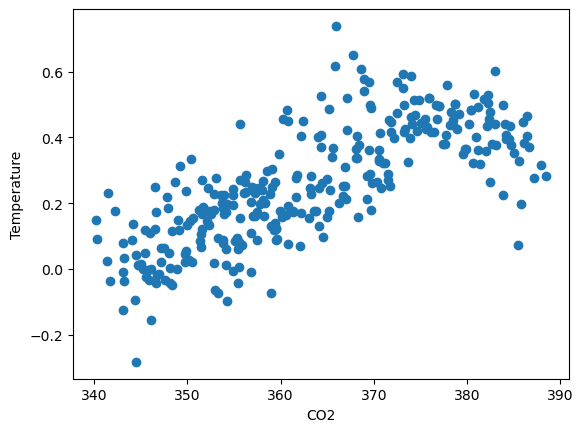

In [8]:
# Is there a linear relashoship between Temperature and CO2?
# on other words, as CO2 increases, does Temperature increase as well? (measure the correlation between CO2 and Temp)
# in the corr table, which other 2 viaribales have positive linear relationship, or possitive correlation?
# the more the abs of correlation between temp and a variable, the more this valiable affected temperature between the years 1993 to 2003
# selesct a variable with maximum corr with temp 
# draw a scatter plot with this var on x and Temp on y. can u see the linear is the relashoship?
plt.scatter(data.CO2,data.Temp)
plt.xlabel('CO2')
plt.ylabel('Temperature')

# does normaliztion of data affect correlations between variabels? 
data.corr()
data_normalized.corr()

1998

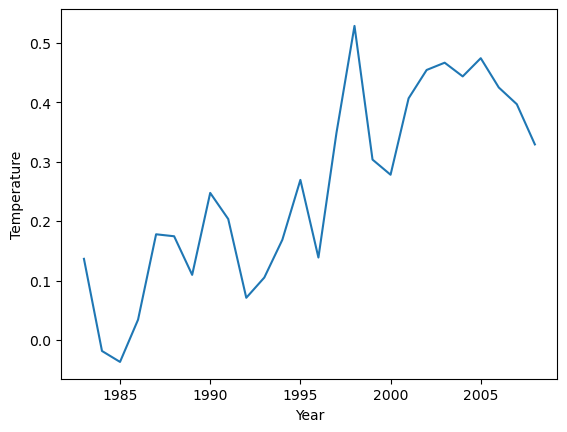

In [9]:
# whats the mean temp per year?
# how does the mean temp change per year? make a plot with mean temp per year on y and year on x
mean_temp_per_year= data.groupby('Year').Temp.mean()
plt.plot(data.Year.unique(),mean_temp_per_year )
plt.xlabel('Year')
plt.ylabel('Temperature')
mean_temp_per_year

# which year was the hottest year in terms of average temperature?
data.Year.unique()[mean_temp_per_year.argmax()]

Text(0.5, 0, 'Year')

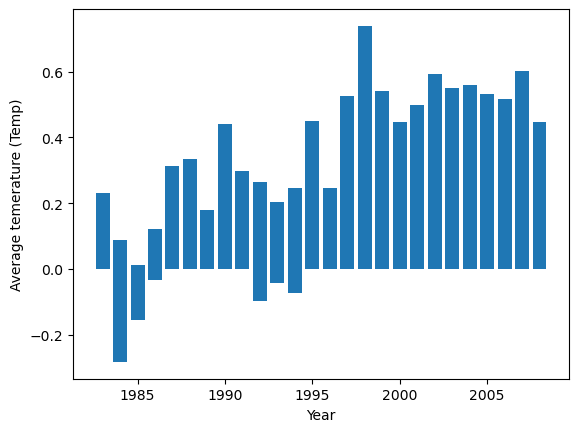

In [13]:
plt.bar( data['Year'],data['Temp'])
plt.ylabel('Average temerature (Temp)')
plt.xlabel('Year')

## Creating our first model: Simple linear regression

#### Gradient method

248 60


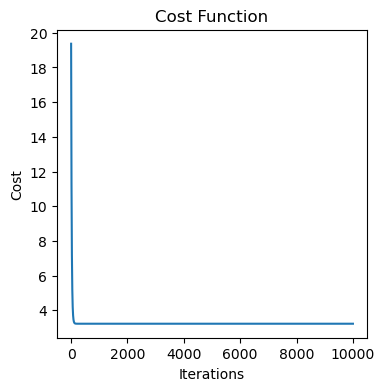

Parameters for the regression line:
Theta[0] = 0.21878629032257965
Theta[1] = 0.13113947572258913
Mean Squared Error (MSE): 0.028597312687967762
Mean Abselute Error (MAE): 0.13043817181789696


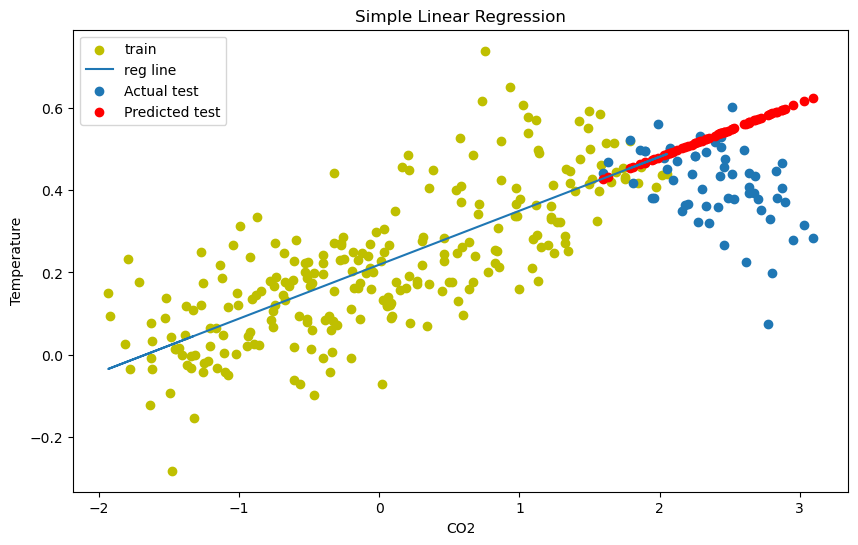

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# your data consists of temp values and green house gases for years between 1983 and 2008. 
# your task is to train a simple regression model on your data for years<=2003
# then predict the temperature values for years>2003 using the trained regression maodel
# if your model works fine you may use it to predict temperature for years we have no data about as well

# split data to train and test. pick all the observations up to and including 2003 as training set and the rest as test set.
# how many day train and test samples do you have?
training_set = data[data.Year<=2003]
test_set = data[data.Year>2003]
print(training_set.shape[0],test_set.shape[0])

# simple reg. is when you have only one ind. var and one dep. var
# pick CO2 as your ind. var and Temp as dep var. this way you'll predict temp. only based on CO2 measurments.
# therefore keep Temp and CO2 columns in both your tarin and test sets nand drop the rest columns
training_set=training_set[['Temp','CO2']]
test_set=test_set[['Temp','CO2']]

# now implimant a simple regression model using 1.Closed Form solution and 2.Gradient descent algorithm
# (doent matter batch ‘or’ stochastic) and train your model using the traing_set then predict Temp on the test part.
# in the Gradient descent algorithm
    # your objective would be to minimize the cost function: np.sum((y_true - y_predicted)**2)
    # after you model is trained, plot the cost function per itteration. 
    # if your cost function does decrease or converge, try normalizing your data. and changing the value of 
    #    learnin rate (alpha). does all values of alpha lead to convergance of the cost function? if not why?
    # how many itterations before your cost function converges?


class LinearRegressionGrandient:
    def __init__(self, alpha=0.01, num_iterations=1000):
        self.alpha = alpha
        self.num_iterations = num_iterations
        self.theta = None
        self.cost_history = None

    def fit(self, X, y):
        # if X has only one dimension meaning X.shape=(d,) then reshape it to a matrix format meaning X.shape(d,1)
        # this matrix form is gonna be needed for later matrix multiplications
        if X.ndim==1: 
            X=X.reshape(-1,1)

        np.random.seed(0)
        # Initialize coefficients with zeros
        self.theta = np.zeros(X.shape[1])
        self.cost_history = []

        # Gradient Descent
        for i in range(self.num_iterations):
            # Calculate predictions
            y_pred = np.dot(X, self.theta)

            # Calculate the error
            error = y_pred - y

            # Calculate the gradient
            gradient = np.dot(X.T, error)

            # Update the parameters
            self.theta -= self.alpha * gradient

            # Calculate and store the cost
            cost = np.sum(error**2)
            self.cost_history.append(cost)

    def predict(self, X):
        # if X has only one dimension meaning X.shape=(d,) then reshape it to a matrix format meaning X.shape=(d,1)
        # this matrix form is gonna be needed for later matrix multiplications
        if X.ndim==1: 
            X=X.reshape(-1,1)

        if self.theta is None:
            raise ValueError("Model has not been trained yet.")
        return np.dot(X, self.theta)

    def plot_cost_history(self):
        if self.cost_history is None:
            raise ValueError("Model has not been trained yet.")
        plt.figure(figsize=(4,4))
        plt.plot(range(self.num_iterations), self.cost_history)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title('Cost Function')
        plt.show()


# Fit the model to the data and plot cost function
X_train,y_train= training_set.CO2.values, training_set.Temp.values
X_test,y_test= test_set.CO2.values, test_set.Temp.values

# normalize
mean = X_train.mean()
std =  X_train.std()
X_train_normalized = (X_train - mean)/std
X_test_normalized = (X_test - mean)/std

# add bias for line bias
X_train_with_bias = np.column_stack((np.ones(X_train_normalized.shape[0]), X_train_normalized))
X_test_with_bias = np.column_stack((np.ones(X_test_normalized.shape[0]), X_test_normalized))

# model : G Descent
model = LinearRegressionGrandient(alpha=0.0001, num_iterations=10000)
model.fit(X_train_with_bias, y_train)
model.plot_cost_history()

# Report the parameters for the regression line
print("Parameters for the regression line:")
for i, param in enumerate(model.theta):
    print(f"Theta[{i}] = {param}")

# Predict temp using the learned parameters
y_pred = model.predict(X_test_with_bias)

# Plot A
plt.figure(figsize=(10,6))
plt.scatter(X_train_normalized, y_train, label='train', c='y')
plt.plot(X_train_normalized, model.predict(X_train_with_bias), label='reg line')
plt.scatter(X_test_normalized, y_test, label='Actual test')
plt.scatter(X_test_normalized, y_pred, label='Predicted test', c='r')
plt.xlabel('CO2')
plt.ylabel('Temperature')
plt.legend()
plt.title('Simple Linear Regression')


# Calculate the RMSE (Root Mean Squared Error)
mse = np.mean((y_pred - y_test) ** 2)
print(f"Mean Squared Error (MSE): {mse}")
mae = np.mean(abs(y_pred - y_test))
print(f"Mean Abselute Error (MAE): {mae}")

#### Colsed form method

248 60
Parameters for the regression line (Closed-Form Solution):
Theta[0] = 0.21878629032258015
Theta[1] = 0.1311394757225897
Mean Squared Error (MSE): 0.02859731268796822
Mean Abselute Error (MAE): 0.13043817181789824


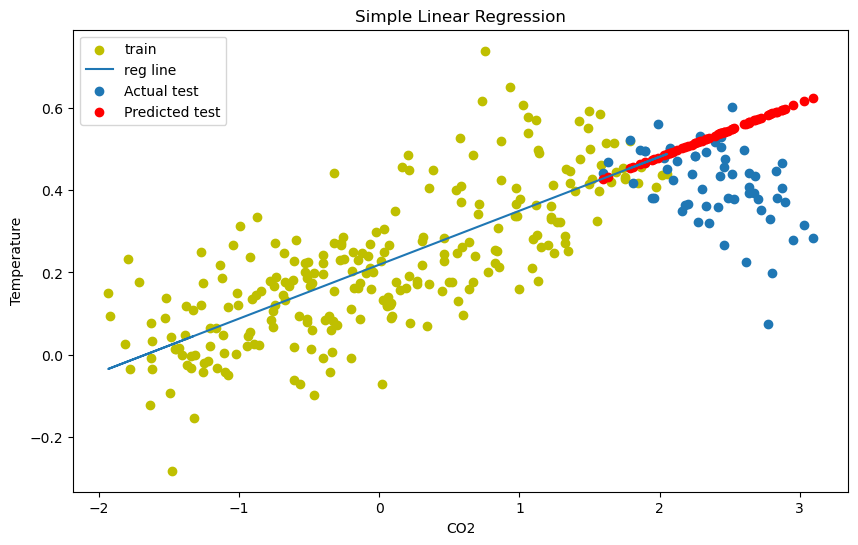

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# your data consists of temp values and green house gases for years between 1983 and 2008. 
# your task is to train a simple regression model on your data for years<=2003
# then predict the temperature values for years>2003 using the trained regression maodel
# if your model works fine you may use it to predict temperature for years we have no data about as well

# split data to train and test. pick all the observations up to and including 2003 as training set and the rest as test set.
# how many day train and test samples do you have?
training_set = data[data.Year<=2003]
test_set = data[data.Year>2003]
print(training_set.shape[0],test_set.shape[0])

# simple reg. is when you have only one ind. var and one dep. var
# pick CO2 as your ind. var and Temp as dep var. this way you'll predict temp. only based on CO2 measurments.
# therefore keep Temp and CO2 columns in both your tarin and test sets nand drop the rest columns
training_set=training_set[['Temp','CO2']]
test_set=test_set[['Temp','CO2']]

# Fit the model to the data and plot cost function
X_train,y_train= training_set.CO2.values, training_set.Temp.values
X_test,y_test= test_set.CO2.values, test_set.Temp.values

# normalize
mean = X_train.mean()
std =  X_train.std()
X_train_normalized = (X_train - mean)/std
X_test_normalized = (X_test - mean)/std

# add bias for line bias
X_train_with_bias = np.column_stack((np.ones(X_train_normalized.shape[0]), X_train_normalized))
X_test_with_bias = np.column_stack((np.ones(X_test_normalized.shape[0]), X_test_normalized))

# Calculate the closed-form solution
theta_closed_form = np.linalg.inv(X_train_with_bias.T.dot(X_train_with_bias)).dot(X_train_with_bias.T).dot(y_train)

# Print the parameters for the regression line
print("Parameters for the regression line (Closed-Form Solution):")
for i, param in enumerate(theta_closed_form):
    print(f"Theta[{i}] = {param}")

# Predictions using the learned parameters
y_pred = np.dot(X_test_with_bias, theta_closed_form)

# Plot A
plt.figure(figsize=(10,6))
plt.scatter(X_train_normalized, y_train, label='train', c='y')
plt.plot(X_train_normalized, model.predict(X_train_with_bias), label='reg line')
plt.scatter(X_test_normalized, y_test, label='Actual test')
plt.scatter(X_test_normalized, y_pred, label='Predicted test', c='r')
plt.xlabel('CO2')
plt.ylabel('Temperature')
plt.legend()
plt.title('Simple Linear Regression')


# Calculate the RMSE (Root Mean Squared Error)
mse = np.mean((y_pred - y_test) ** 2)
print(f"Mean Squared Error (MSE): {mse}")
mae = np.mean(abs(y_pred - y_test))
print(f"Mean Abselute Error (MAE): {mae}")

## Creating our second model: Multiple linear regression

#### Closed form method

Parameters for the regression line (Closed-Form Solution):
Theta[0] = -952.1055657641897
Theta[1] = 39.14483421212552
Theta[2] = 3.977021073068184
Theta[3] = 0.12071079993593434
Theta[4] = -15.140585898279785
Theta[5] = -4.596848212392548
Theta[6] = 2.7329332927784806
Theta[7] = 63.03449649509862
Theta[8] = -953.6131736997643
Mean Squared Error (MSE): 0.007121786712823391
Mean Abselute Error (MAE): 0.06969701277727859


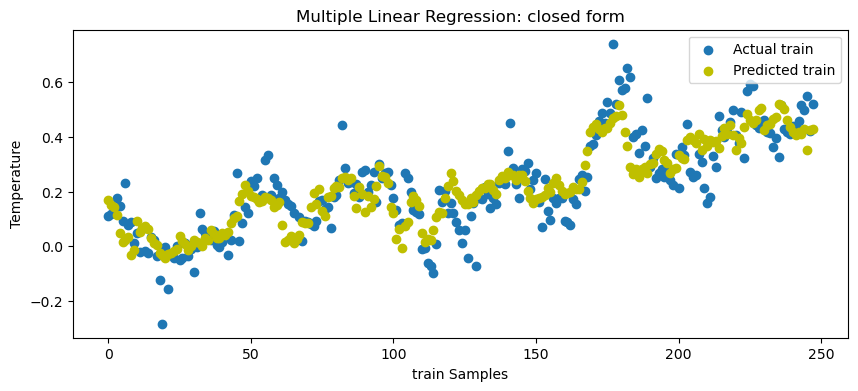

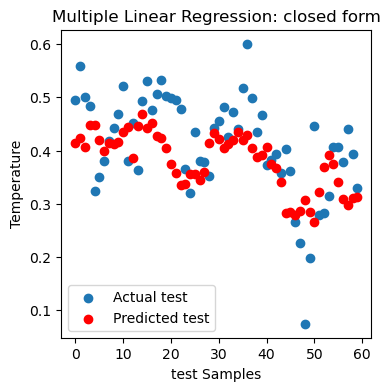

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

training_set = data[data.Year<=2003]
test_set = data[data.Year>2003]

training_set=training_set.drop(['Year','Month'],axis=1)
test_set=test_set.drop(['Year','Month'],axis=1)

# Fit the model to the data and plot cost function
X_train,y_train= training_set.drop(['Temp'],axis=1).values, training_set.Temp.values
X_test,y_test= test_set.drop(['Temp'],axis=1).values, test_set.Temp.values

# normalize
mean = X_train.mean()
std =  X_train.std()
X_train_normalized = (X_train - mean)/std
X_test_normalized = (X_test - mean)/std

# add bias for line bias
X_train_with_bias = np.column_stack((np.ones(X_train_normalized.shape[0]), X_train_normalized))
X_test_with_bias = np.column_stack((np.ones(X_test_normalized.shape[0]), X_test_normalized))

# Calculate the closed-form solution
theta_closed_form = np.linalg.inv(X_train_with_bias.T.dot(X_train_with_bias)).dot(X_train_with_bias.T).dot(y_train)

# Print the parameters for the regression line
print("Parameters for the regression line (Closed-Form Solution):")
for i, param in enumerate(theta_closed_form):
    print(f"Theta[{i}] = {param}")

# Predictions using the learned parameters
y_pred = np.dot(X_test_with_bias, theta_closed_form)

# Plot A
plt.figure(figsize=(10,4))
plt.scatter(range(len(y_train)), y_train, label='Actual train')
plt.scatter(range(len(y_train)), np.dot(X_train_with_bias, theta_closed_form), label='Predicted train', c='y')
plt.xlabel('train Samples')
plt.ylabel('Temperature')
plt.legend()
plt.title('Multiple Linear Regression: closed form')
plt.figure(figsize=(4,4))
plt.scatter(range(len(y_test)), y_test, label='Actual test')
plt.scatter(range(len(y_test)), y_pred, label='Predicted test', c='r')
plt.xlabel('test Samples')
plt.ylabel('Temperature')
plt.legend()
plt.title('Multiple Linear Regression: closed form')


# Calculate the RMSE (Root Mean Squared Error)
mse = np.mean((y_pred - y_test) ** 2)
print(f"Mean Squared Error (MSE): {mse}")
mae = np.mean(abs(y_pred - y_test))
print(f"Mean Abselute Error (MAE): {mae}")

<!-- #### Gradient method: (no need) -->

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

training_set = data[data.Year<=2003]
test_set = data[data.Year>2003]

training_set=training_set.drop(['Year','Month'],axis=1)
test_set=test_set.drop(['Year','Month'],axis=1)

class LinearRegressionGrandient:
    def __init__(self, alpha=0.01, num_iterations=1000):
        self.alpha = alpha
        self.num_iterations = num_iterations
        self.theta = None
        self.cost_history = None

    def fit(self, X, y):
        # if X has only one dimension meaning X.shape=(d,) then reshape it to a matrix format meaning X.shape(d,1)
        # this matrix form is gonna be needed for later matrix multiplications
        if X.ndim==1: 
            X=X.reshape(-1,1)

        np.random.seed(0)
        # Initialize coefficients with zeros
        self.theta = np.zeros(X.shape[1])
        self.cost_history = []

        # Gradient Descent
        for i in range(self.num_iterations):
            # Calculate predictions
            y_pred = np.dot(X, self.theta)

            # Calculate the error
            error = y_pred - y

            # Calculate the gradient
            gradient = np.dot(X.T, error)

            # Update the parameters
            self.theta -= self.alpha * gradient

            # Calculate and store the cost
            cost = np.sum(error**2)
            self.cost_history.append(cost)

    def predict(self, X):
        # if X has only one dimension meaning X.shape=(d,) then reshape it to a matrix format meaning X.shape=(d,1)
        # this matrix form is gonna be needed for later matrix multiplications
        if X.ndim==1: 
            X=X.reshape(-1,1)

        if self.theta is None:
            raise ValueError("Model has not been trained yet.")
        return np.dot(X, self.theta)

    def plot_cost_history(self):
        if self.cost_history is None:
            raise ValueError("Model has not been trained yet.")
        plt.figure(figsize=(4,4))
        plt.plot(range(self.num_iterations), self.cost_history)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title('Cost Function')
        plt.show()


# Fit the model to the data and plot cost function
X_train,y_train= training_set.drop(['Temp'],axis=1).values, training_set.Temp.values
X_test,y_test= test_set.drop(['Temp'],axis=1).values, test_set.Temp.values

# normalize
mean = X_train.mean()
std =  X_train.std()
X_train_normalized = (X_train - mean)/std
X_test_normalized = (X_test - mean)/std

# add bias for line bias
X_train_with_bias = np.column_stack((np.ones(X_train_normalized.shape[0]), X_train_normalized))
X_test_with_bias = np.column_stack((np.ones(X_test_normalized.shape[0]), X_test_normalized))

# model : G Descent
model = LinearRegressionGrandient(alpha=0.0001, num_iterations=10000)
model.fit(X_train_with_bias, y_train)
model.plot_cost_history()

# Report the parameters for the regression line
print("Parameters for the regression line:")
for i, param in enumerate(model.theta):
    print(f"Theta[{i}] = {param}")

# Predict temp using the learned parameters
y_pred = model.predict(X_test_with_bias)

# Plot A
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_train)), y_train, label='Actual train',c='k')
plt.scatter(range(len(y_train)), model.predict(X_train_with_bias), label='Predicted train', c='y')
plt.scatter(range(len(y_test)), y_test, label='Actual test',c='b')
plt.scatter(range(len(y_test)), y_pred, label='Predicted test', c='r')
plt.xlabel('Sample')
plt.ylabel('Temperature')
plt.legend()
plt.title('Multiple Linear Regression: result plots')


# Calculate the RMSE (Root Mean Squared Error)
mse = np.mean((y_pred - y_test) ** 2)
print(f"Mean Squared Error (MSE): {mse}")
mae = np.mean(abs(y_pred - y_test))
print(f"Mean Abselute Error (MAE): {mae}")